In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv("Datasets/economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
# Drop the unneccessary coloumns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

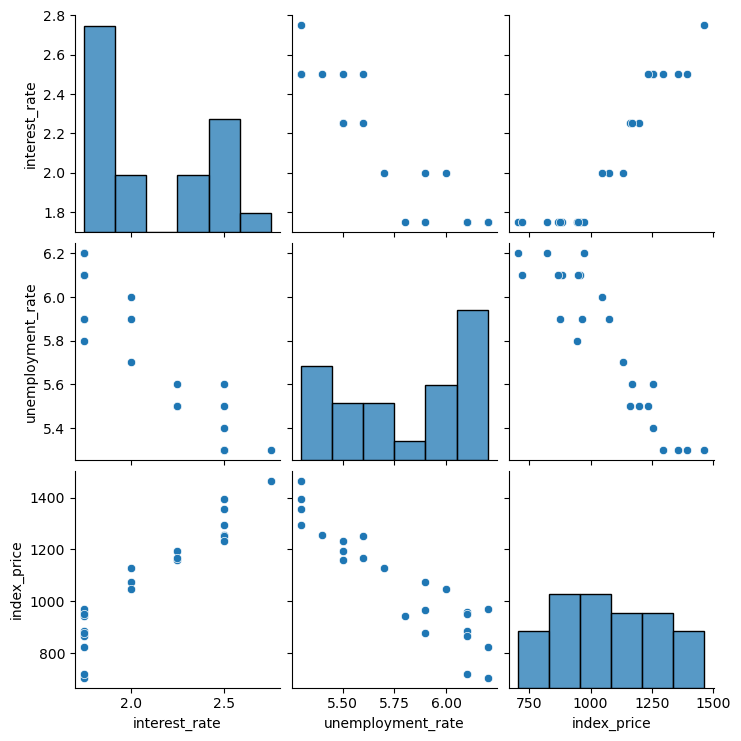

In [11]:
### Visulization
import seaborn as sns
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'interest_rate')

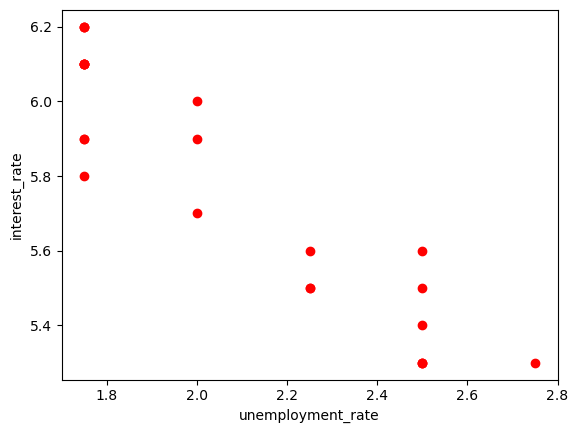

In [13]:
### Visualize datapoints more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel("unemployment_rate")
plt.ylabel("interest_rate")

In [15]:
## independent and dependent features
X=df_index.iloc[:,:-1]
Y=df_index.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [22]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [27]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

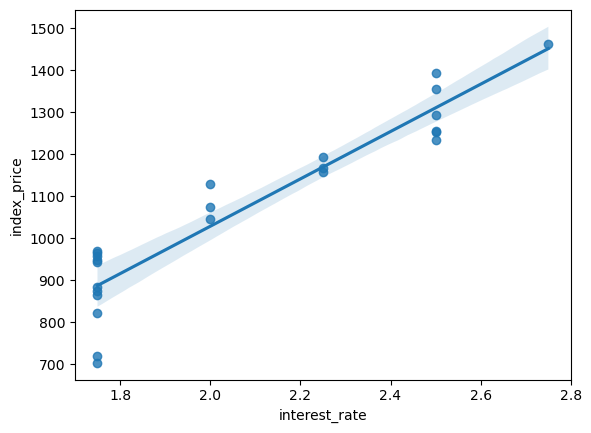

In [30]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

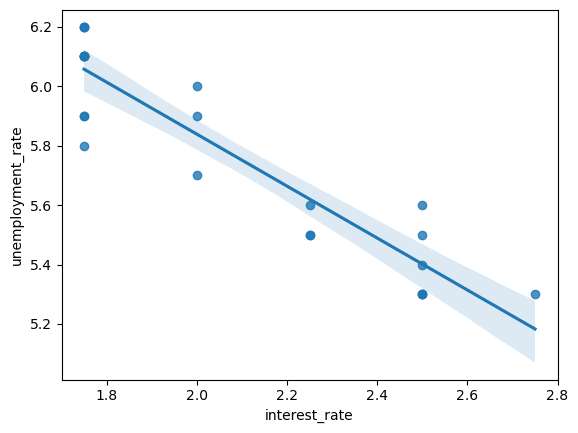

In [31]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

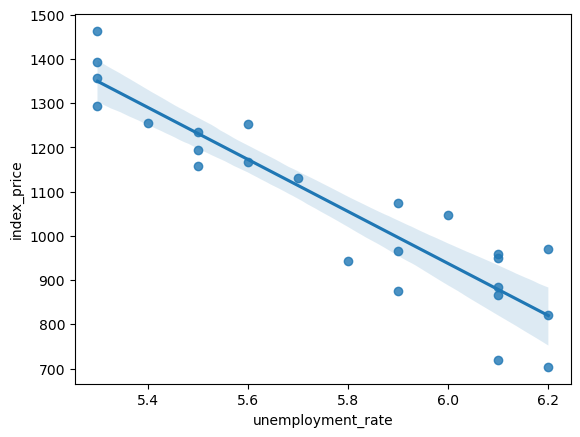

In [34]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [40]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [41]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [42]:
reg.fit(X_train,Y_train)

LinearRegression()

In [43]:
### Cross validation 
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [45]:
np.mean(validation_score)

-5914.828180162388

In [46]:
## prediction

Y_pred=reg.predict(X_test)

In [47]:
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [48]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [49]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(f"MSE={mse}")
print(f"MAE={mae}")
print(f"RMSE={rmse}")

MSE=8108.567426306604
MAE=73.80444932337097
RMSE=90.04758423359621


In [50]:
## r-squared

from sklearn.metrics import r2_score


In [51]:
score=r2_score(Y_test,Y_pred)
print(f"R^2={score}")

R^2=0.7591371539010257


In [52]:
## Adjusted R2
adjR2_score=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print(f"Adjusted R^2={adjR2_score}")

Adjusted R^2=0.5985619231683761


# Assumptions

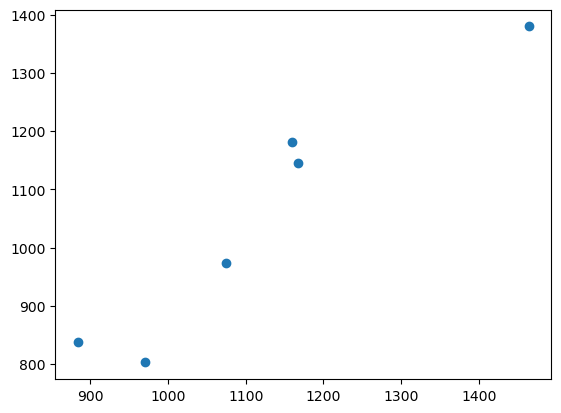

In [53]:
plt.scatter(Y_test,Y_pred)

In [55]:
residuals=Y_test-Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


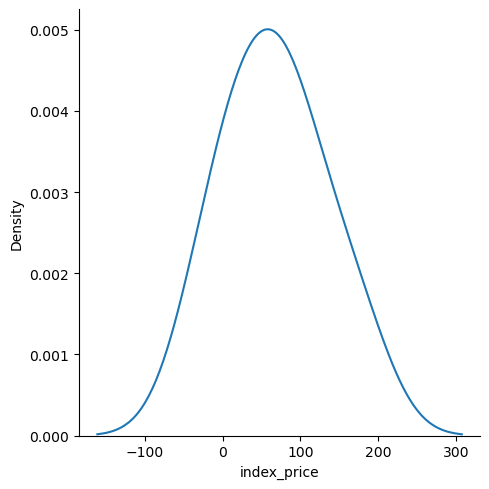

In [56]:
## plot residuals
sns.displot(residuals,kind='kde')

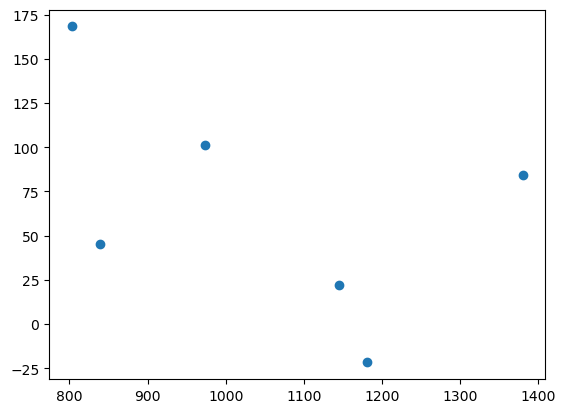

In [57]:
## scatter plot wrt residuals and prediction

plt.scatter(Y_pred,residuals)

In [ ]:
## above plot show the data is uniformly distributed which is good

In [58]:
### Linear Regression with OLS

import statsmodels.api as sm


In [59]:
model=sm.OLS(Y_train,X_train).fit()

In [60]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                       0.754
Time:                        23:57:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\91821\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
print(reg.coef_)

[  88.27275507 -116.25716066]
